/Users/sahil/Documents/PROGRAMS/Python/AIML/env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans.


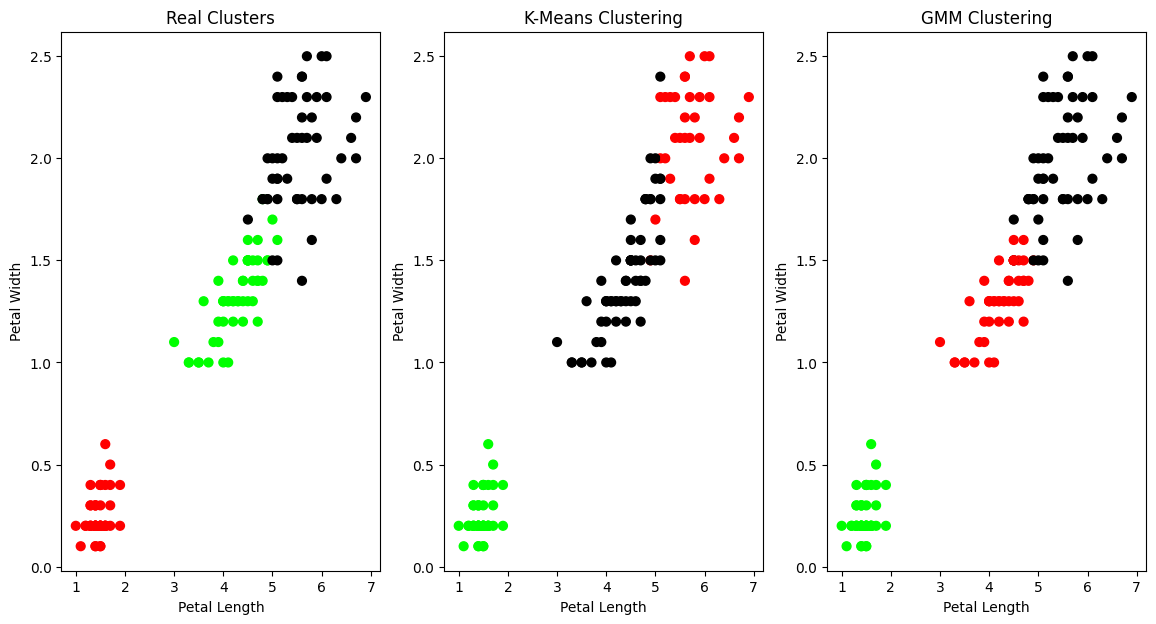

In [8]:
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.cluster import KMeans 
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture 


iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width'] 
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime', 'black'])

plt.subplot(1, 3, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40) 
plt.title('Real Clusters')
plt.xlabel('Petal Length') 
plt.ylabel('Petal Width')

model = KMeans(n_clusters=3)
model.fit(X) 

plt.subplot(1, 3, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40) 
plt.title('K-Means Clustering')
plt.xlabel('Petal Length') 
plt.ylabel('Petal Width')


scaler = preprocessing.StandardScaler() 
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)
gmm = GaussianMixture(n_components=3) 
gmm.fit(xs)
y_cluster_gmm = gmm.predict(xs)

plt.subplot(1, 3, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y_cluster_gmm%3], s=40) 
plt.title('GMM Clustering')
plt.xlabel('Petal Length') 
plt.ylabel('Petal Width')

print('Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans.')